In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets

Create synthetic dataset using make_blobs

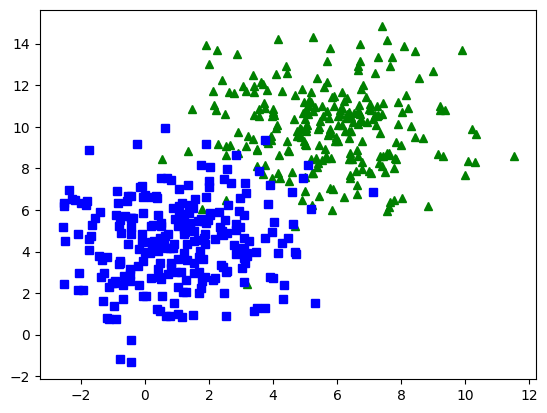

In [2]:
n = 500
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=2, random_state=1247)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

Split into training and test sets

In [3]:
y_shape = y.reshape(n,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

Use sklearn's Perceptron to create a classifier, clf

In [4]:
from sklearn.linear_model import Perceptron

clf = Perceptron()

clf.fit(X_train,Y_train)

print("Classifier Weights: ", clf.coef_)
print("Classifier Constant:", clf.intercept_)

Classifier Weights:  [[-11.5479219  -12.25106009]]
Classifier Constant: [122.]


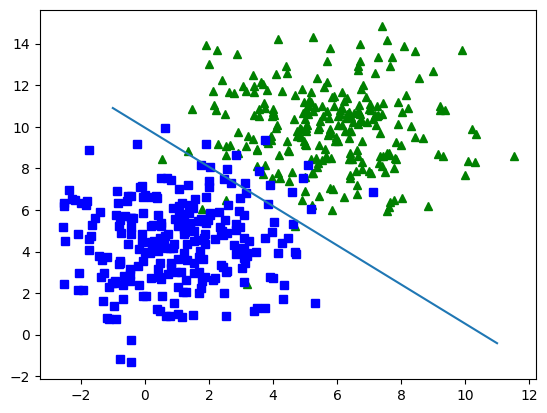

In [5]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

# Decision boundary 
xx = np.linspace(-1,11)
yy = (clf.coef_[0][0]*xx + clf.intercept_)/(-1*clf.coef_[0][1])
plt.plot(xx, yy)
plt.show()

The score method

In [6]:
acc = clf.score(X_test,Y_test)
print(acc)

0.9866666666666667


Import confusion_matrix from sklearn.metrics

In [7]:
from sklearn.metrics import confusion_matrix

Use the test set to generate predictions and a confusion matrix

In [8]:
y_pred = clf.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[76,  0],
       [ 2, 72]])

Use other metrics, such as F1-score, Precision, and Recall, to evaluate your classifier

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [10]:
f1_score(Y_test,y_pred)

0.9863013698630136

In [11]:
precision_score(Y_test,y_pred)

1.0

In [12]:
recall_score(Y_test,y_pred)

0.972972972972973

Finally, we can also evaluate the accuracy score of our trained model on test data. 

*Note that this returns the same accuracy score as clf.score()*

In [13]:
accuracy_score(Y_test, y_pred)

0.9866666666666667